NAME: Alison Camille Dunning

PID: A16166698
# MATH 183 Project 1 - Statistical Regression Analysis
## I. Variables of Interest
We'll be using the `wage.csv` for our analysis. The two variables we will examine are `educ` and `exper`. Is there a correlation between years of experience vs. years of schooling?

In [1]:
library(tidyverse)

data = read.csv('wage.csv')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
head(data, 5)

wage,exper,female,tenure3,educ
3.1,2,1,0,11
3.2,22,1,0,12
3.0,2,0,0,11
6.0,44,0,1,8
5.3,7,0,0,12


## II. Data Cleaning, Screening, and Descriptive Statistics
Let's get some more specific information about our data, such as the data types and the number of observations.

In [3]:
str(data)

'data.frame':	526 obs. of  5 variables:
 $ wage   : num  3.1 3.2 3 6 5.3 8.8 11 5 3.6 18 ...
 $ exper  : int  2 22 2 44 7 9 15 5 26 22 ...
 $ female : int  1 1 0 0 0 0 0 1 1 0 ...
 $ tenure3: int  0 0 0 1 0 1 1 1 1 1 ...
 $ educ   : int  11 12 11 8 12 16 18 12 12 17 ...


However, since we'll be conducting a bivariate analysis on `educ` and `exper`, let's filter out the rest of the variables.

In [4]:
reg_data <- data %>% select(exper, educ)
head(reg_data, 5)

exper,educ
2,11
22,12
2,11
44,8
7,12


Now, our dataframe has a new shape because we only have two variables, as well as 526 observations:

In [5]:
dim(reg_data)

[1] 526   2

We want to identify missing values within this dataset, if any. We'll do that by encoding negative numerical values as `NA`.

Then, let's verify that our dataset is complete using `is.na()`

In [6]:
reg_data[reg_data < 0] <- NA

# Get percentage of missing values
mean(is.na(reg_data))

[1] 0

0% of our data are `na`, so we're good!
### Numerical Summaries
Luckily, much of the information we want can be found by calling `summary()` on our dataset.

In [7]:
# Mean, median, 25th and 17th quartiles, min, and max
summary(reg_data)

     exper            educ      
 Min.   : 1.00   Min.   : 0.00  
 1st Qu.: 5.00   1st Qu.:12.00  
 Median :13.50   Median :12.00  
 Mean   :17.02   Mean   :12.56  
 3rd Qu.:26.00   3rd Qu.:14.00  
 Max.   :51.00   Max.   :18.00  

Let's get another measure, the range.
#### Range
This measure is very sensitive to outliers.

In [8]:
range(reg_data$exper)[2] - range(reg_data$exper)[1]

[1] 50

In [9]:
range(reg_data$educ)[2] - range(reg_data$educ)[1]

[1] 18

## III. Distribution Statistics and Graphs


Loading required package: sm
Package 'sm', version 2.2-5.6: type help(sm) for summary information
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



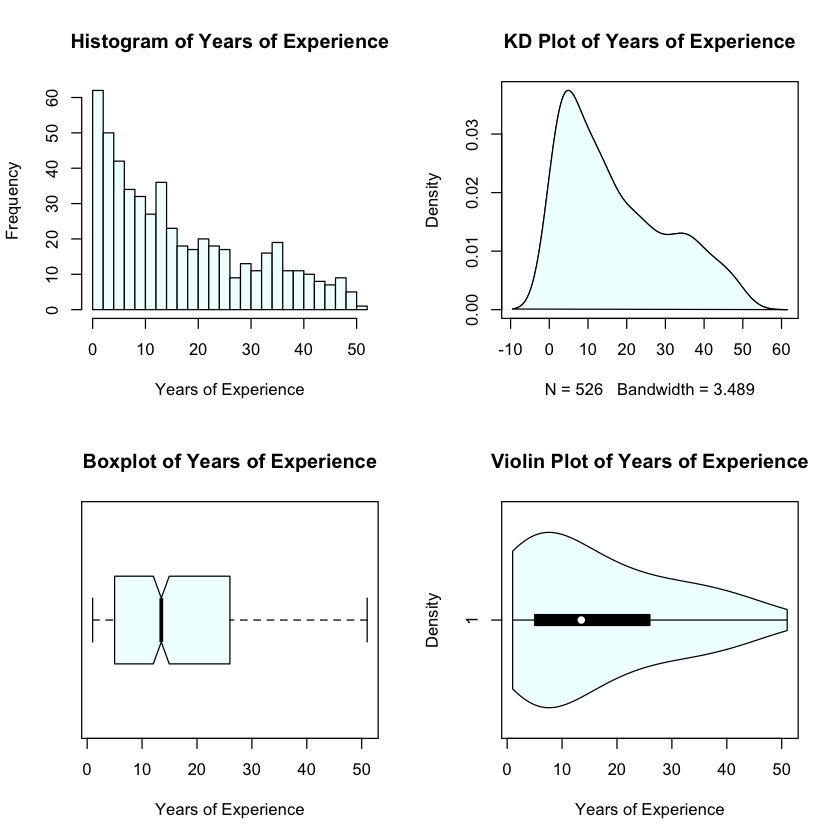

In [10]:
library('vioplot')

par(mfrow=c(2, 2))

# Histogram
hist(
    reg_data$exper,
    breaks=20,
    col='azure',
    xlab='Years of Experience',
    main='Histogram of Years of Experience'
)

# Kernel Density Plot
density <- density(reg_data$exper)
plot(
    density,
    main='KD Plot of Years of Experience')
polygon(density, col='azure')

# Boxplot
boxplot(
    reg_data$exper,
    col='azure',
    xlab='Years of Experience',
    main='Boxplot of Years of Experience',
    horizontal=T,
    notch=T
)

# Violin Plot
vioplot(
    reg_data$exper,
    col='azure',
    xlab='Years of Experience',
    ylab='Density',
    main='Violin Plot of Years of Experience',
    horizontal=T
)

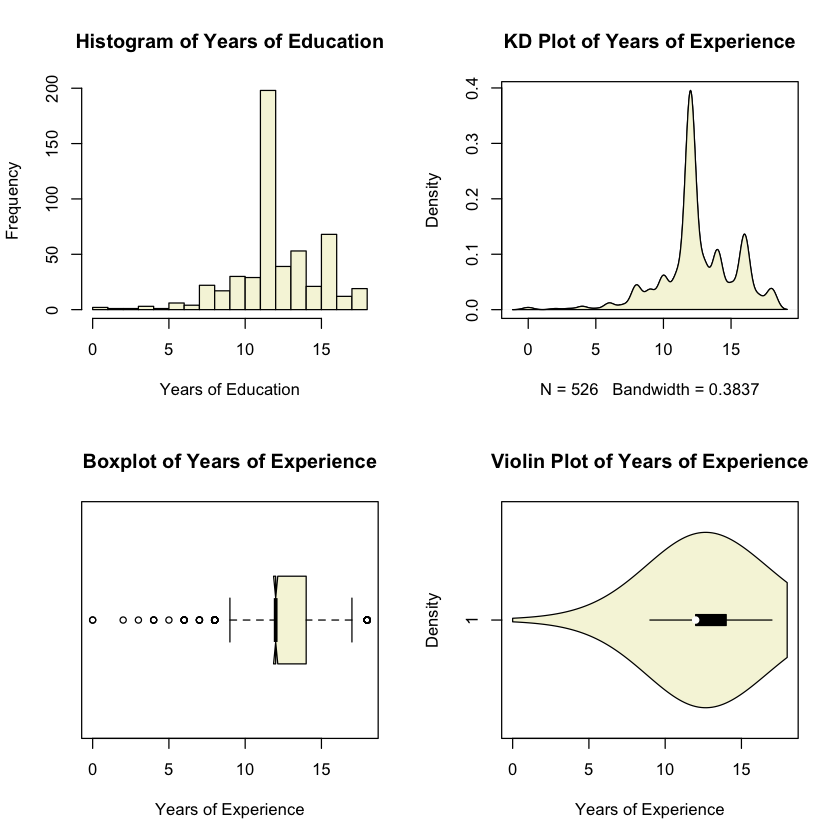

In [11]:
par(mfrow=c(2, 2))

# Histogram
hist(
    reg_data$educ,
    breaks=20,
    col='beige',
    xlab='Years of Education',
    main='Histogram of Years of Education'
)

# Kernel Density Plot
density <- density(reg_data$educ)
plot(
    density,
    main='KD Plot of Years of Experience')
polygon(density, col='beige')

# Boxplot
boxplot(
    reg_data$educ,
    col='beige',
    xlab='Years of Experience',
    main='Boxplot of Years of Experience',
    horizontal=T,
    notch=T
)

# Violin Plot
vioplot(
    reg_data$educ,
    col='beige',
    xlab='Years of Experience',
    ylab='Density',
    main='Violin Plot of Years of Experience',
    horizontal=T
)